

# Test image generation using scikit-image
## Goal: Make sample image for cell counting in FIJI
#### _And review a bit about loops and indexing_

***

### Steps:
    1. Generate blank image matrix
    2. Generate circles of random size and position 
    3. Plot circles on image
    4. Save image
    
***



In [1]:
#import the needed packages
%matplotlib inline  
import math
import numpy as np
import matplotlib.pyplot as plt
import random



### Generate an image matrix of zeros that we will use to plot objects into
---

In [2]:
#set image size
img = np.zeros((1024, 1024, 3), dtype=np.double)  #image is 1024 by 1024 with 3 channels for rgb.  The images 


### We will use sci-kit image to draw circles
#### We start with plotting a single circle, then we will plot multiple circles
---

In [3]:
#import skimage methods
from skimage.draw import circle


In [ ]:
# create a filled circle.  The function circle requires four variables, (row, column, radius, image shape)
# rr, cc are the rows and columns that are the cooridinates for pixels which will be filled by the circle

center_row = 512
center_column = 512
radius=200

rr, cc = circle(center_row, center_column, radius, img.shape)
img[rr, cc, :] = (1, 1, 1)

In [5]:
#Print out rr,cc and see what they look like
#print(rr,cc)
print('The number of pixels contained in the circle is: ',len(cc))

#How many pixels vs expected?
area_image_circle = len(cc)
area_expected = np.pi*radius**2

difference = area_expected - area_image_circle
print('The difference between the expected area of the circle and the actual is:', round(difference,3))

percent_difference = (difference/area_expected)*100
print('The percent difference between the expected area and the actual is:', round(percent_difference,3))

[200] [156]


In [ ]:
#What is image shape?
print(img.shape)

#How many channels are there?
print(img.shape[2])

In [ ]:
#set axes size 
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(10, 6))  #10 by 6 inch container for the figure
ax1.imshow(img)
ax1.set_title('Circles')
ax1.axis('on')  #Shows the axis, we note that the figure runs with an origin in the upper left corner
plt.show()

### Experiement: What happens when we go back and change the position of the circle, and replot the image? 
---







---

---

---

### Quick review on for loops
***

In [6]:
#can iterate over numbers
for x in range(10):
    print(x)

    
#can iterate over objects in a list
list_of_cities = ['Syracuse', 'Utica', 'Rome', 'Ithaca', 'Buffalo', 'Rochester','Albany', 'New York']

for city in list_of_cities:
    print(city)
    

0
1
2
3
4
5
6
7
8
9
Syracuse
Utica
Rome
Ithaca
Buffalo
Rochester
Albany
New York





## Generate circles with random, gaussian distributed sizes
---
### Looking at the circles before, we need a list of radii, and a list of centers.
---
#### We can use the _random.gauss_ function to generate our radii, and _random.randrange_ to generate positions for our centers

In [7]:
#Make random assortment of radii with a gaussian distribution and a given standard deviation

random.seed(10)  #seed will give us the same random numbers everytime
mu = 15 #mean of the distribution
std = 4 #standard deviation of the distribution
radii = []

#Make a for loop to generate a list of radii

for n in range(20):
    radii.append(random.gauss(mu, std))

#view the first ten entries of the list
radii[0:10]

[11.185131967746651,
 13.163623372645258,
 12.603002111163658,
 13.719430395774083,
 17.88687322964025,
 8.130940328930304,
 13.652584672832544,
 13.057700710464356,
 11.465040949883827,
 14.538318422678156]

### Quick Practical
#### List indexing
1. How do we index a single entry?  What is the 11th radii in the list?
2. How do we slice a list?  Find the 11th through the last entries
---

In [8]:
#show the 11th entry of radii
radii[10]

15.000206414768732

In [9]:
#show the list of radii from the 11th to the last entry
radii[10:]

[15.000206414768732,
 24.885293632641755,
 16.207419701326064,
 14.97387574912037,
 18.47088581054114,
 10.813052730993316,
 12.596007776264528,
 17.21227634655695,
 12.992783958306333,
 11.062766781598375]

## Generate coordinates for circle centers

In [ ]:
#Create 20 circle positions
centers = []  #initialize empty list for centers

buffer = mu+std        #distance we have to be from the edge
max_px = img.shape[0]  #number of rows or columns (used a square image)


for k in range(20):
    center = (random.randrange(buffer, max_px-buffer), random.randrange(buffer, max_px-buffer))
    centers.append(center)
    

In [10]:
#Show only the first entry from centers
centers[0]

(721, 329)

In [11]:
#Show only the row value from the first entry
centers[0][0]

721

In [12]:
len(centers)  #Find the length of the centers list.

20

In [13]:
#reset image to zeros, and blank out the radii and centers lists

img = np.zeros((1024, 1024, 3), dtype=np.double)  
rr = []
cc = []

## Practical
Using a for loop for the length of the radii or centers list, generate a matrix with the center positions and radii pulled from their respective lists.

Should you clear the __img[rr,cc,:]__ list between operations?

In [14]:
for k in range(len(centers)):
    rr,cc = circle(centers[k][0], centers[k][1], radii[k], img.shape)
    img[rr, cc, :] = (1,1,1)

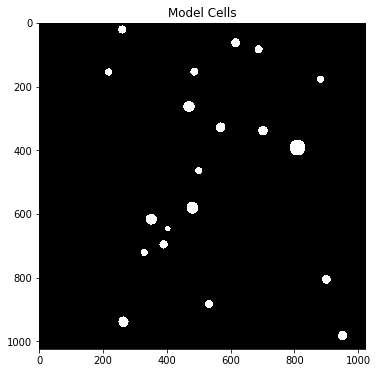

In [15]:
#set axes size
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(10, 6))  #10 by 6 inch container for the figure
ax1.imshow(img)
ax1.set_title('Model Cells')
ax1.axis('on')
plt.show()

### Saving the image 

In [ ]:
plt.imsave('random_circles.tiff', img)  #save the image

In [ ]:
#For more tutorials on more shapes, see https://scikit-image.org/docs/dev/auto_examples/edges/plot_shapes.html#sphx-glr-auto-examples-edges-plot-shapes-py